In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from tqdm import tqdm
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open("../kaggle.json") as f:
    kaggle_data = json.load(f)
    
os.environ["KAGGLE_USERNAME"] = kaggle_data["username"]
os.environ["KAGGLE_KEY"] = kaggle_data["key"]

In [4]:
import logging
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
import os

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import itertools

# Read the dataset

In [6]:
api = KaggleApi()
api.authenticate()
api.dataset_download_files("prosperchuks/health-dataset", path="../")
with zipfile.ZipFile("../health-dataset.zip", "r") as f:
    f.extractall("../data/raw")

# EDA

In [7]:
df = pd.read_csv("../data/raw/diabetes_data.csv")

In [8]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [10]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

************************************************************************************************


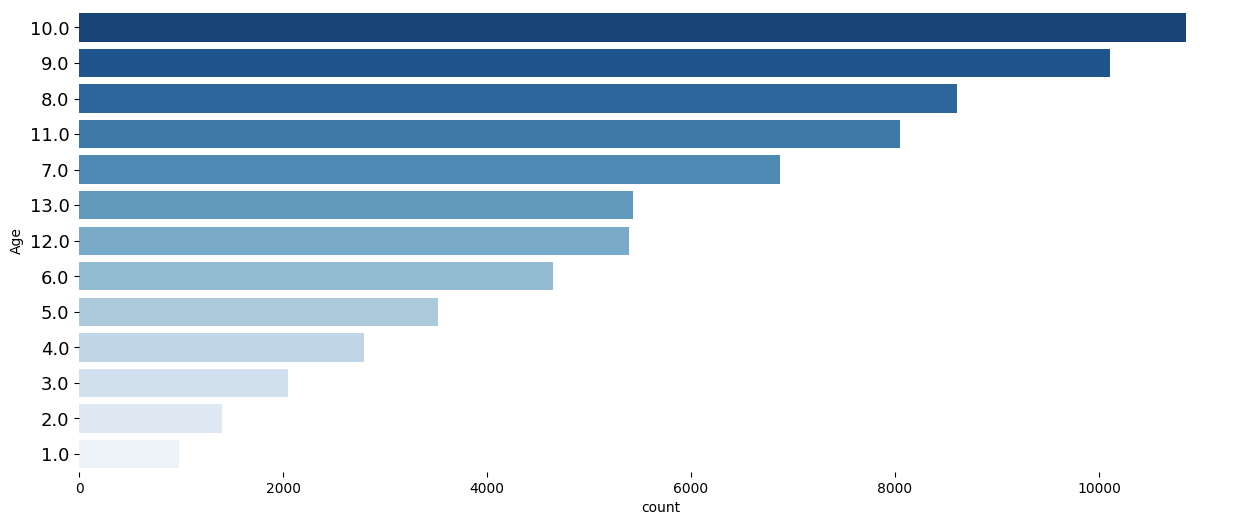

************************************************************************************************


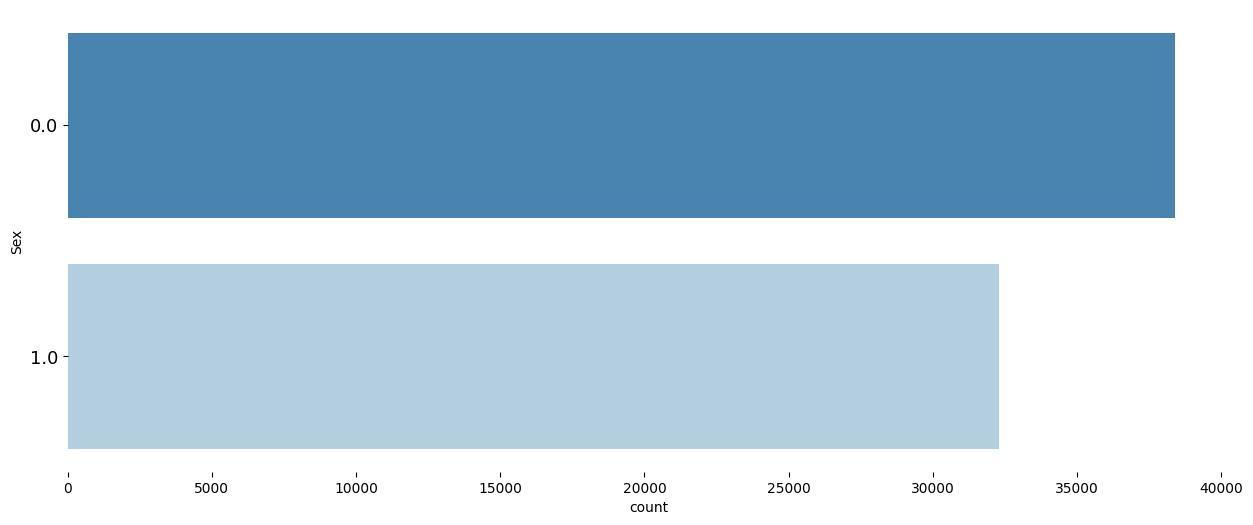

************************************************************************************************


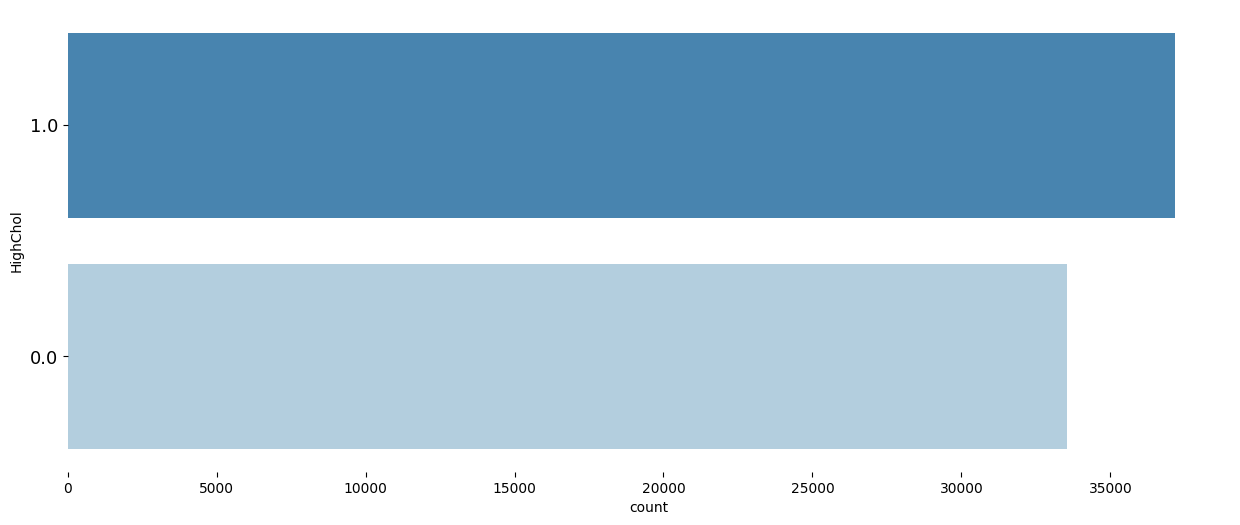

************************************************************************************************


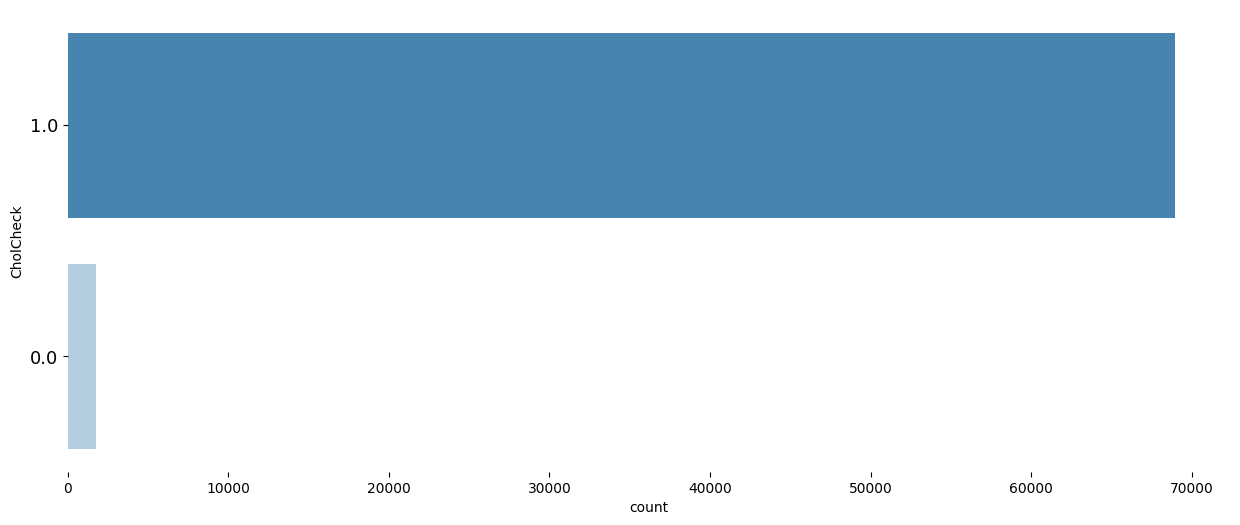

************************************************************************************************


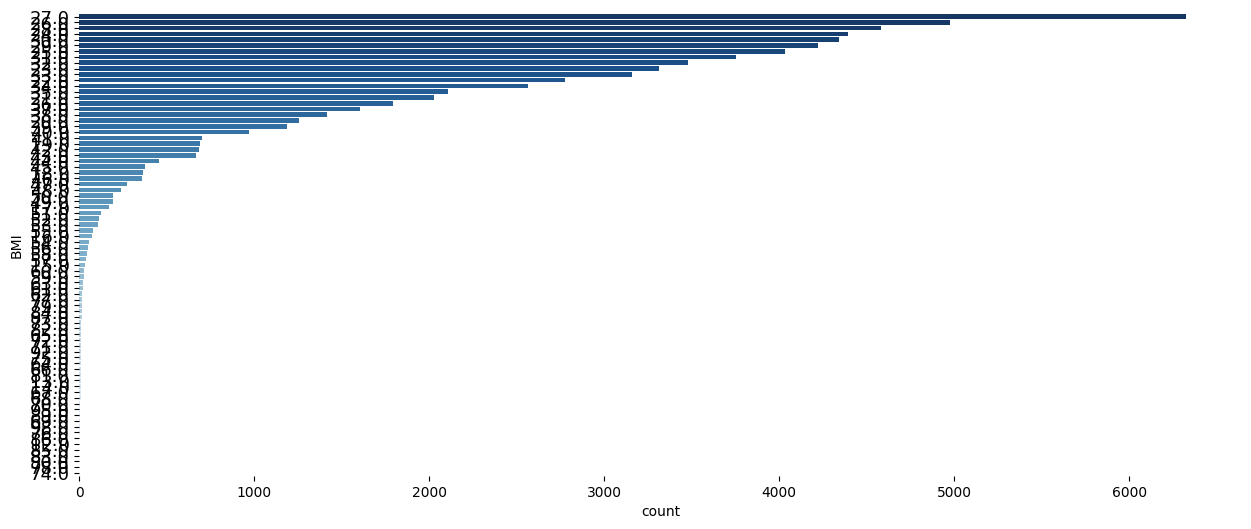

************************************************************************************************


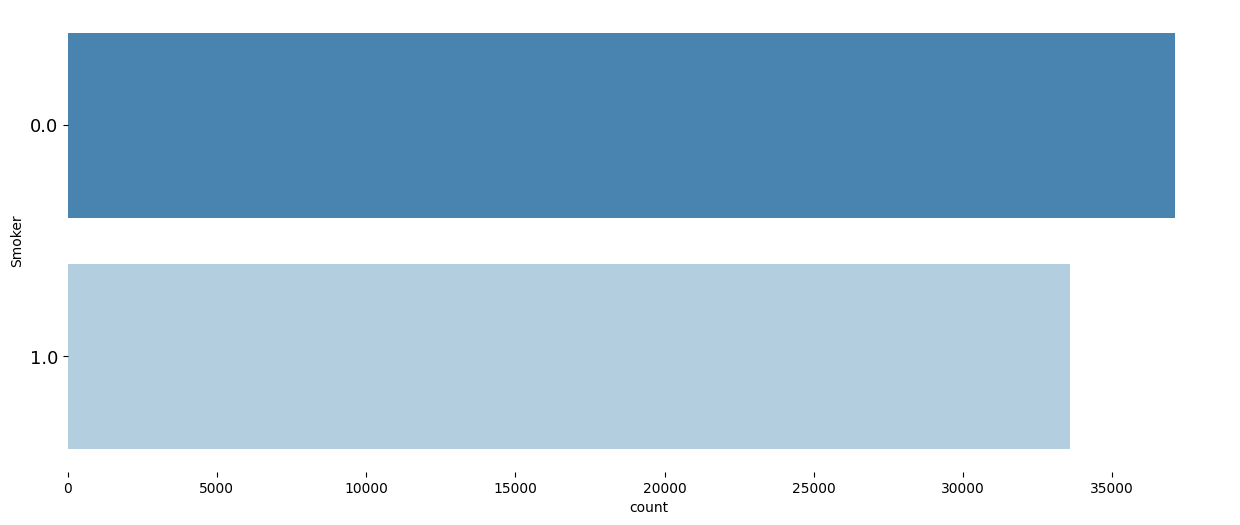

************************************************************************************************


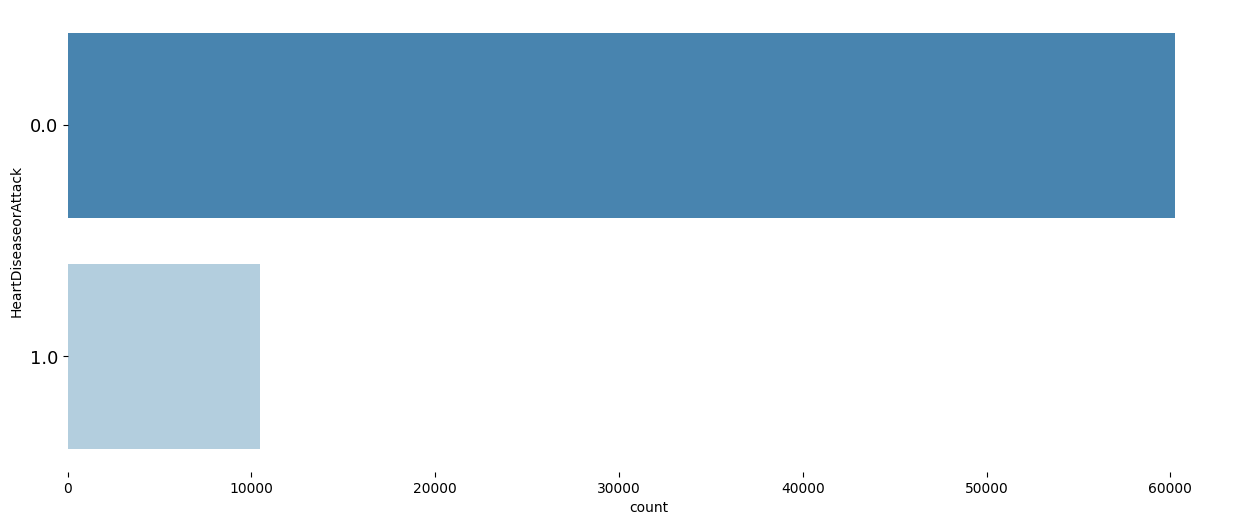

************************************************************************************************


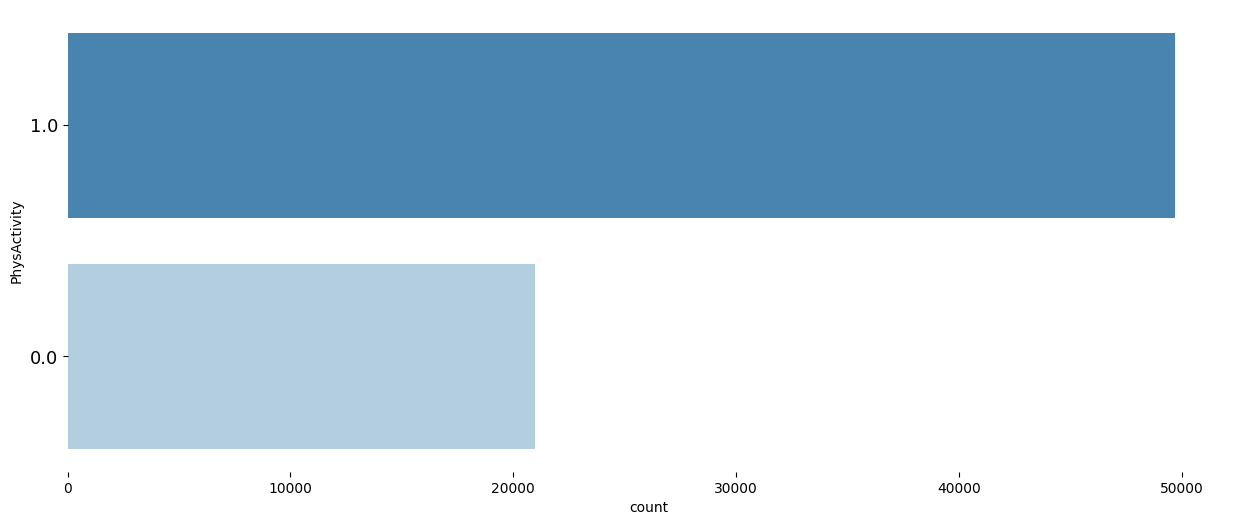

************************************************************************************************


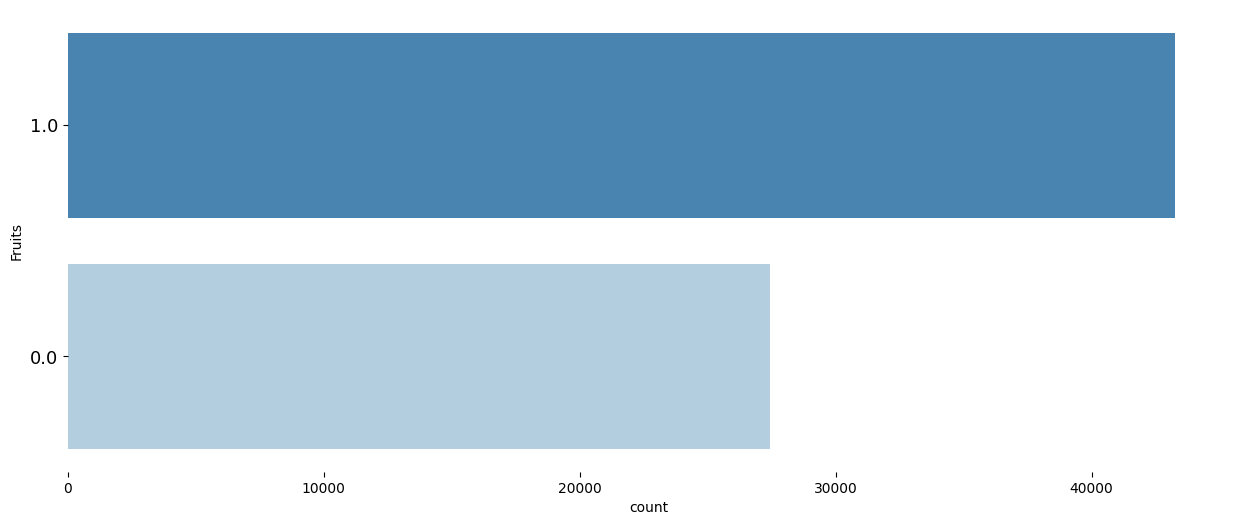

************************************************************************************************


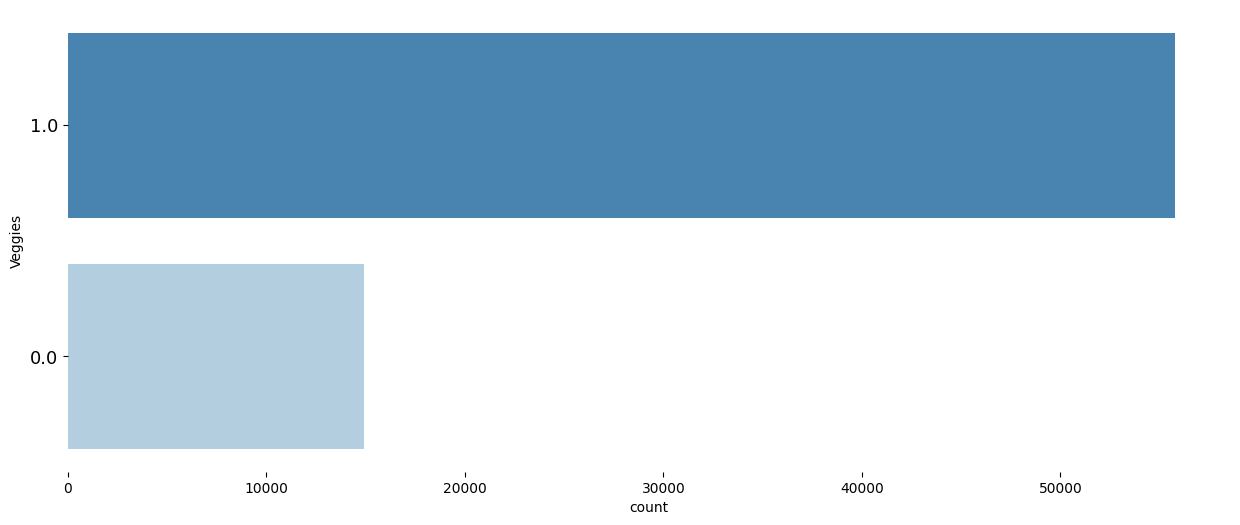

************************************************************************************************


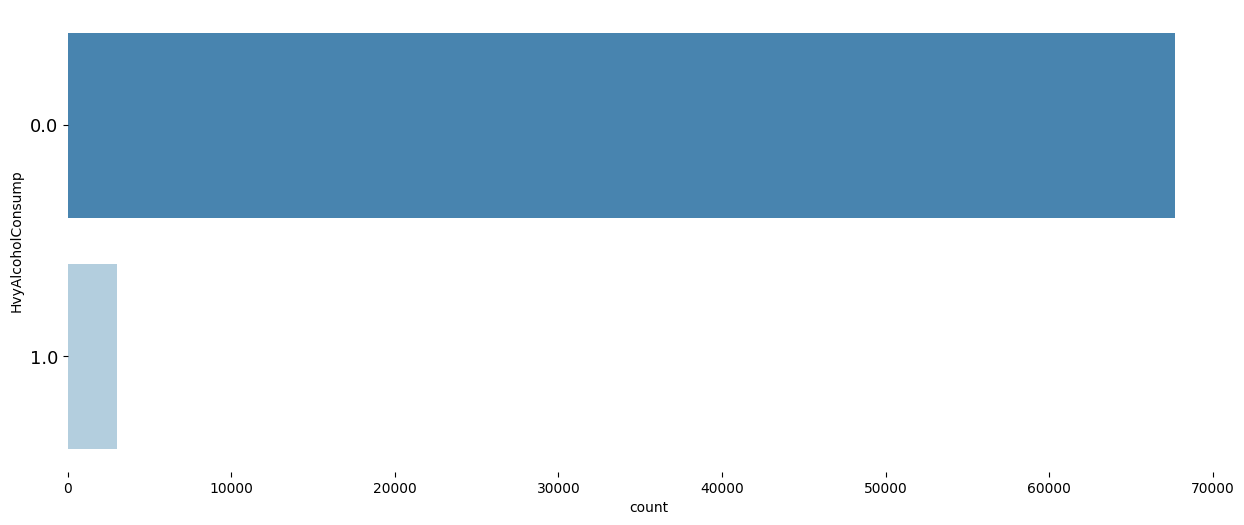

************************************************************************************************


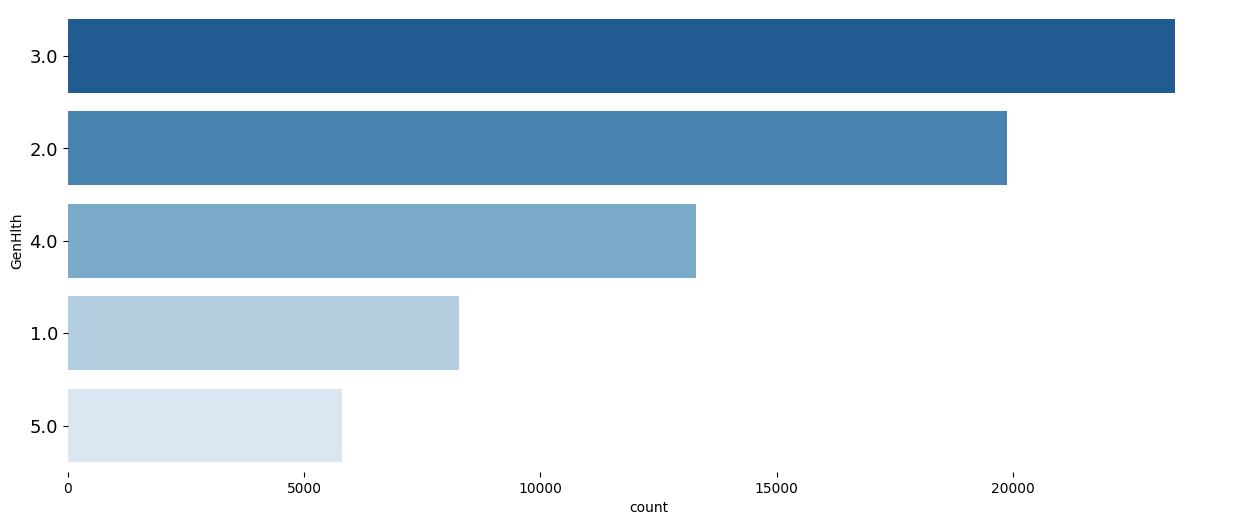

************************************************************************************************


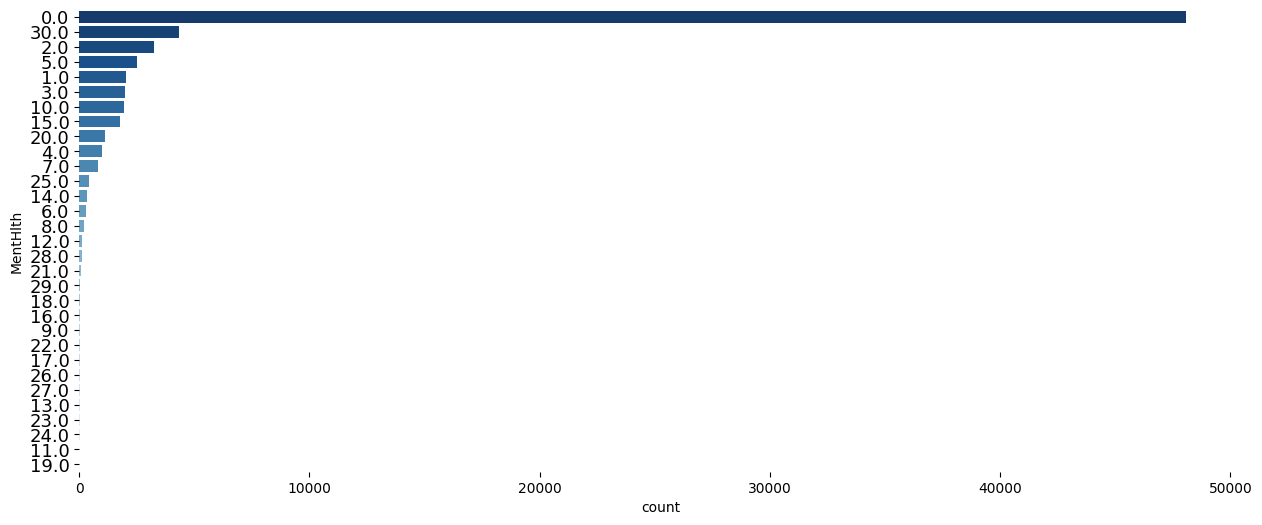

************************************************************************************************


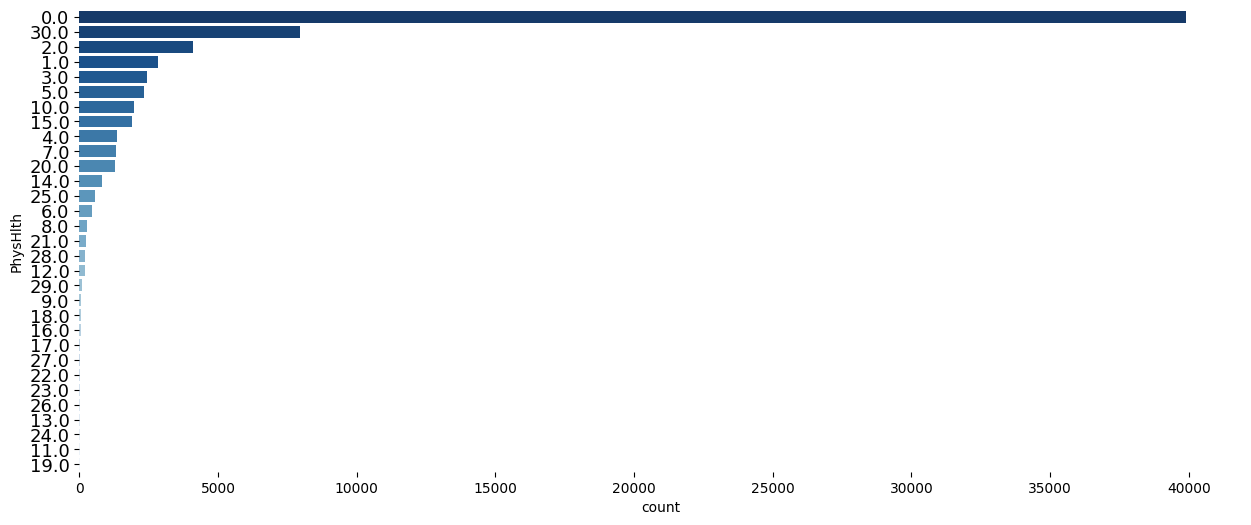

************************************************************************************************


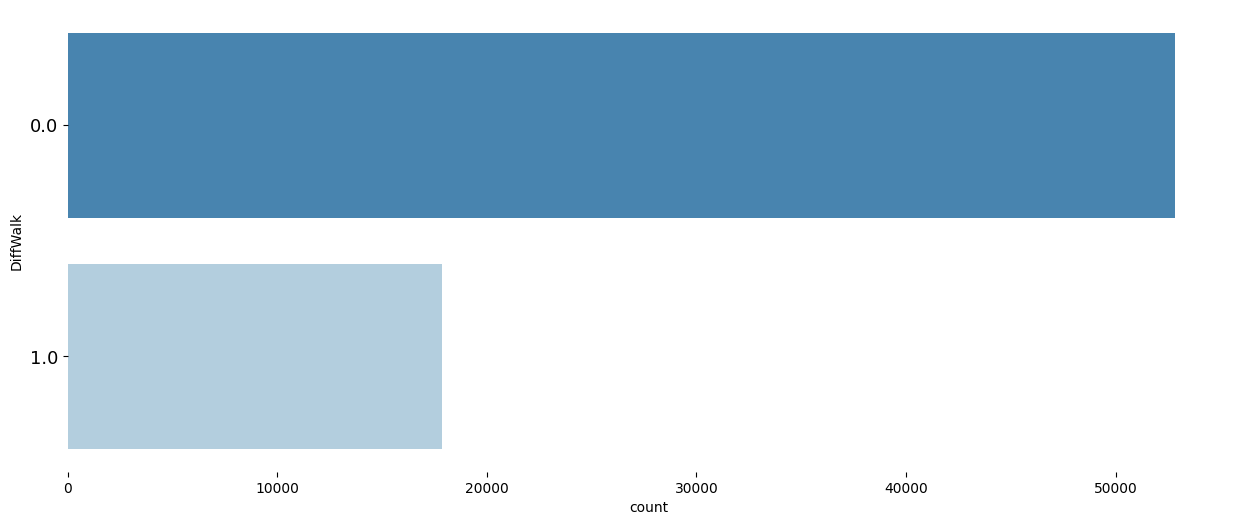

************************************************************************************************


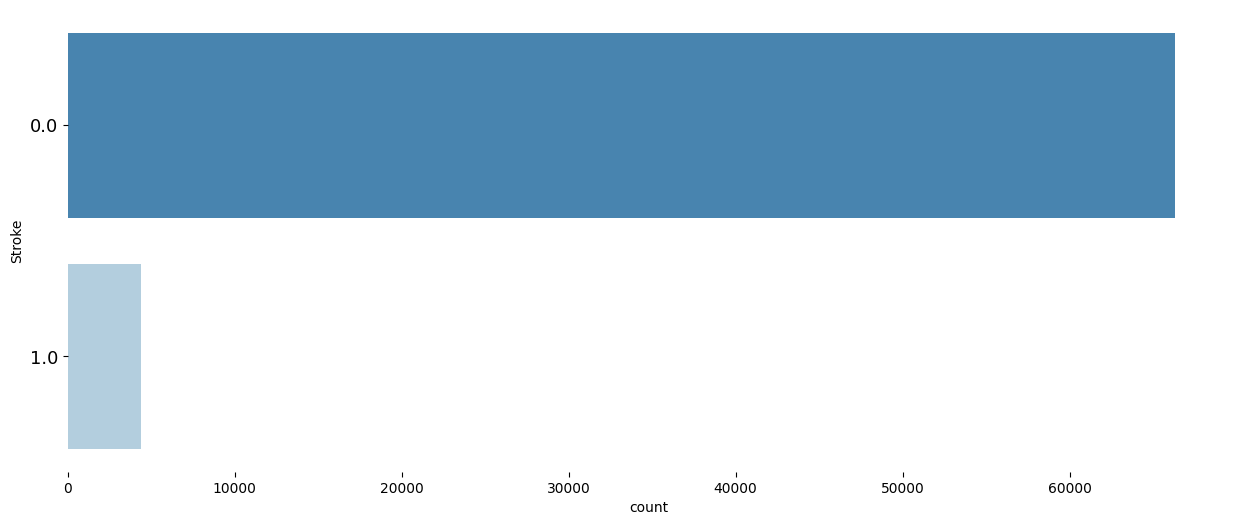

************************************************************************************************


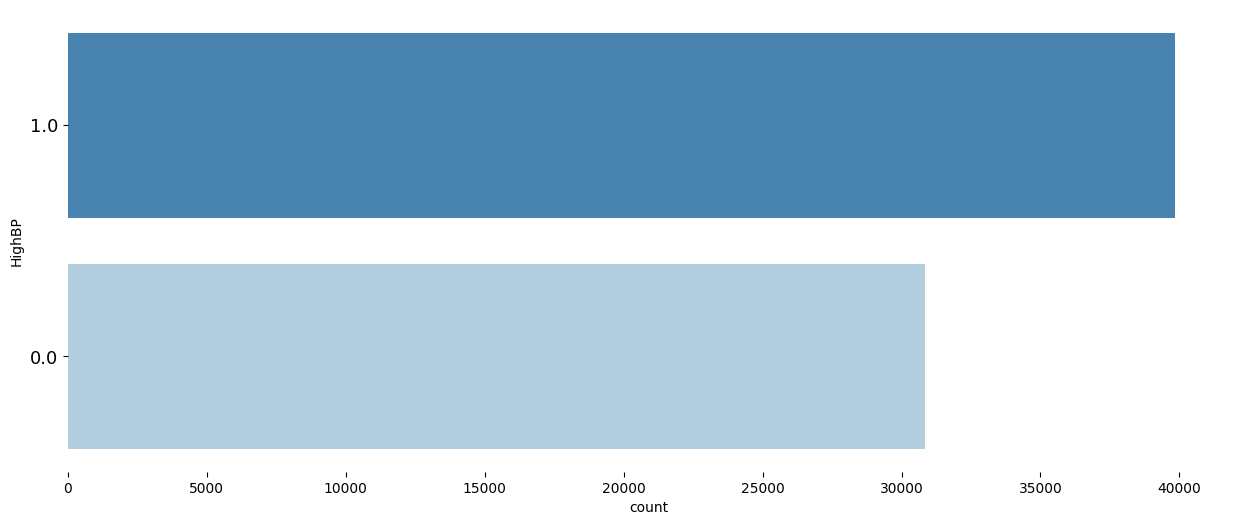

************************************************************************************************


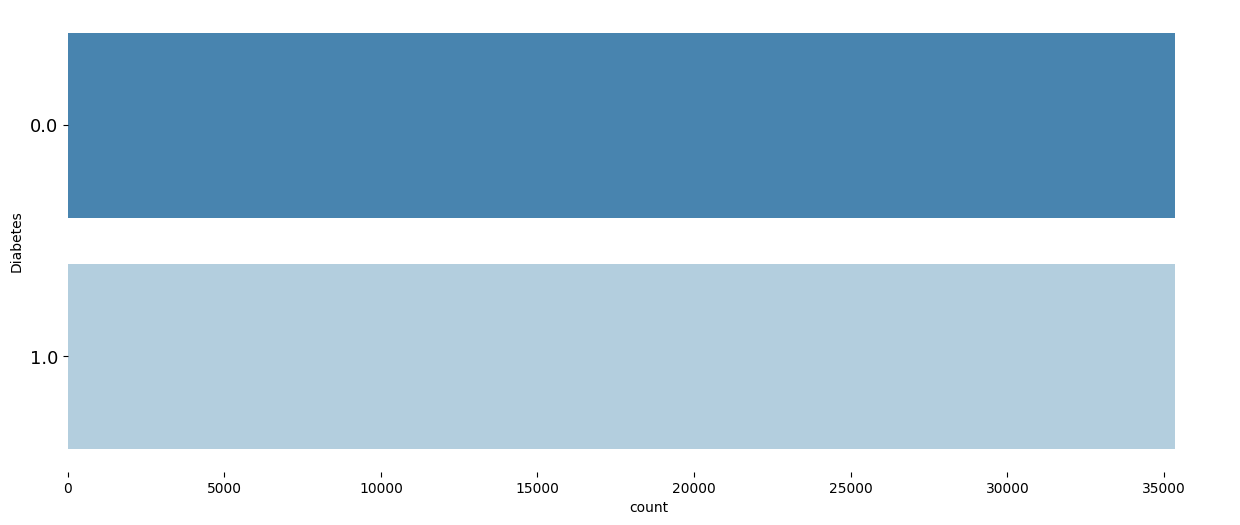

In [11]:
for col in df.columns:
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    sns.countplot(y=df[col], data=df, order=df[col].value_counts().index, palette='Blues_r')
    plt.ylabel(col)
    plt.yticks(fontsize=13)
    print("************************************************************************************************")
    plt.box(False)
    plt.show()

In [12]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

I will remove some features like HvyAlcoholConsump, CholCheck, and HeartDiseaseorAttack because these features are highly unbalanced. Veggies  is also removed because I think its features is unimportant.

# Feature selection

In [13]:
df = df.drop(['Veggies'], axis=1)

In [14]:
if not os.path.exists("../data/processed"):
    os.makedirs("../data/processed")

In [15]:
df.to_csv("../data/processed/featured_data.csv", index=False)

# train - test  splitting

I will build the diabetes classification system with logistic regression

In [16]:
df = pd.read_csv("../data/processed/featured_data.csv")

In [17]:
train, test = train_test_split(df, test_size=0.3, random_state=0)

In [18]:
train_csv = "../data/processed/train.csv"
test_csv = "../data/processed/test.csv"

In [19]:
train.to_csv(train_csv, index=False)
test.to_csv(test_csv, index=False)

# Training

In [20]:
train_df = pd.read_csv(train_csv)

In [21]:
y_train = train_df.loc[:, "Diabetes"].values.astype('int32')

In [22]:
x_train = train.drop("Diabetes", axis=1)

In [23]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [24]:
grid={"C":[0.001], "max_iter":[100], "solver": ['lbfgs'], "multi_class":["multinomial"]}

In [25]:
logreg = LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=3)

In [26]:
logreg.fit(x_train_scaled, y_train)

LogisticRegression()

# Evaluation

In [27]:
test = pd.read_csv("../data/processed/test.csv")

In [28]:
y_test = test.loc[:, "Diabetes"].values.astype(int)
x_test = test.drop("Diabetes", axis=1)
x_test_scaled = scaler.transform(x_test)

In [29]:
y_pred= logreg.predict(x_test_scaled)

In [30]:
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int32)

In [31]:
y_test

array([0, 0, 1, ..., 1, 1, 0])

In [41]:
type(y_test)

numpy.ndarray

In [32]:
acc = np.mean(y_pred==y_test)

In [33]:
print(f"The accuracy is {acc}")

The accuracy is 0.7485382874387023


In [42]:
cm = confusion_matrix(y_test, y_pred)

In [43]:
type(cm)

numpy.ndarray

In [34]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp + fn)

In [35]:
print(f"The specificity is {round(specificity, 2)} and the sensitivity is {round(sensitivity, 2)}")

The specificity is 0.72 and the sensitivity is 0.77


In [36]:
reports_folder = "../report"

In [37]:
if not os.path.exists("../report"):
    os.makedirs("../report")

In [38]:
cmap = None
title = 'Confusion Matrix'
target_names = ["Diabetes", "No Diabetes"]
normalize = False

In [39]:
accuracy = np.trace(cm)/ float(np.sum(cm))
misclass = 1 - accuracy

if cmap is None:
    cmap = plt.get_cmap('Blues')

Text(0.5, -19.281349115245995, 'Predicted label \n accuracy=0.7485; misclass=0.2515')

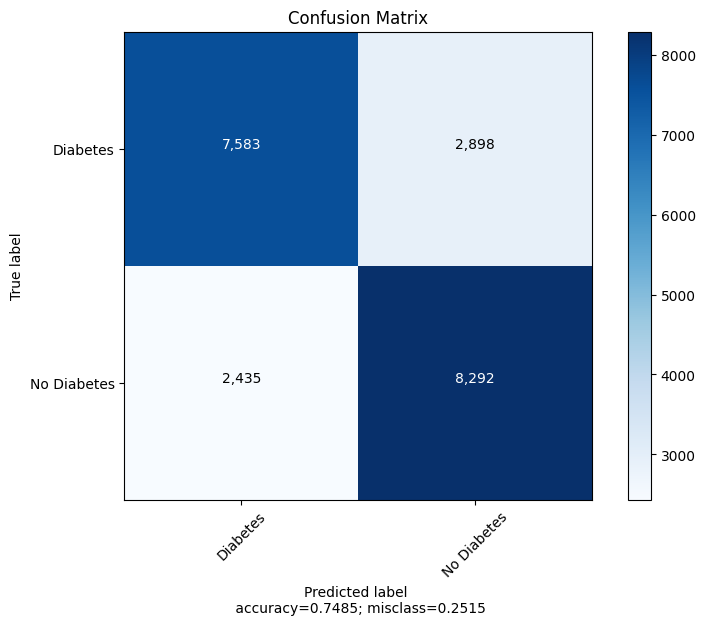

In [40]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()


if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    
if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

thresh = cm.max() / 1.5 if normalize else cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if normalize:
        plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label \n accuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))